In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.no_bias == False:
            X = np.concatenate([np.ones(X.shape[0]).reshape(-1, 1), X], axis=1)
            if X_val is not None:
                X_val = np.concatenate([np.ones(X_val.shape[0]).reshape(-1, 1), X_val], axis=1)
        self.coef_ = np.zeros(X.shape[1]).reshape(-1, 1)
        if self.verbose:
            for i in range(self.iter):
                error = self._linear_hypothesis(X) - y
                self.coef_ = self._gradient_descent(X, error)
                j_theta = self._compute_cost(X, y)
                self.loss[i] = j_theta
                print('{}回目、theta:{}、j_theta:{}'.format(i, self.coef_, j_theta))
                if X_val is not None and y_val is not None:
                    j_theta_val = self._compute_cost(X_val, y_val)
                    self.val_loss[i] = j_theta_val
                    print('{}回目、theta:{}、j_theta_val:{}'.format(i, self.coef_, j_theta_val))
        
        else:
            for i in range(self.iter):
                error = self._linear_hypothesis(X) - y
                self.coef_ = self._gradient_descent(X, error)
                self.loss[i] = self._compute_cost(X, y)
                if X_val is not None and y_val is not None:
                    j_theta_val = self._compute_cost(X_val, y_val)
                    self.val_loss[i] = j_theta_val

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if self.no_bias == False:
            X = np.concatenate([np.ones(X.shape[0]).reshape(-1, 1), X], axis=1)
        h_theta = np.dot(X, self.coef_)
        
        return h_theta
    
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        h_theta = np.dot(X, self.coef_)
        
        return h_theta
    
    def _gradient_descent(self, X, error):
        """
        勾配降下法を用いて特徴量の重みのパラメータを更新する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        self.coef_ -= self.lr*np.dot(X.T, error)/X.shape[0]

        return self.coef_

    def _compute_cost(self, X, y):
        """
        勾配降下法を用いて特徴量の重みのパラメータを更新する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        y : 次の形のndarray, shape (n_samples, )

        Returns
        -------
          次の形のndarray, shape (1, 1)
          目的関数の値

        """
        j_theta = MSE(self._linear_hypothesis(X), y)

        return j_theta

# 【問題1】仮定関数

## class ScratchLinearRegression()にdef _linear_hypothesis(self, X)を追加。中身は下記コード
        h_theta = np.dot(X, self.coef_)
        
        return h_theta

# 【問題2】最急降下法

## class ScratchLinearRegression()にdef _gradient_descent(self, X, error)を追加。中身は下記コード
        self.coef_ -= self.lr*np.dot(X.T, error)/X.shape[0]

        return self.coef_
## fit(self, X, y, X_val=None, y_val=None)に下記コードを追加
        if self.no_bias == False:
            X = np.concatenate([np.ones(X.shape[0]).reshape(-1, 1), X], axis=1)
            if X_val is not None:
                X_val = np.concatenate([np.ones(X_val.shape[0]).reshape(-1, 1), X_val], axis=1)
        self.coef_ = np.zeros(X.shape[1]).reshape(-1, 1)
        if self.verbose:
            for i in range(self.iter):
                error = self._linear_hypothesis(X) - y
                self.coef_ = self._gradient_descent(X, error)
                self.loss[i] = self._compute_cost(X, y)
                print('{}回目、theta:{}、j_theta:{}'.format(i, self.coef_, j_theta))
                if X_val is not None and y_val is not None:
                    j_theta_val = self._compute_cost(X_val, y_val)
                    self.val_loss[i] = j_theta_val
                    print('{}回目、theta:{}、j_theta_val:{}'.format(i, self.coef_, j_theta_val))
        
        else:
            for i in range(self.iter):
                error = self._linear_hypothesis(X) - y
                self.coef_ = self._gradient_descent(X, error)
                self.loss[i] = self._compute_cost(X, y)
                if X_val is not None and y_val is not None:
                    j_theta_val = self._compute_cost(X_val, y_val)
                    self.val_loss[i] = j_theta_val


# 【問題3】推定

## def predict(self, X)に下記コードを追加
        h_theta = np.dot(X, self.coef_)
        
        return h_theta

# 【問題4】平均二乗誤差

In [3]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = np.dot((y_pred-y).T, y_pred-y)/len(y)
    
    return mse

# 【問題5】目的関数

## class ScratchLinearRegression()にdef _compute_cost(self, X, y)を追加。中身は下記コード。
        j_theta = MSE(self._linear_hypothesis(X), y)
        
        return j_theta

# 【問題6】学習と推定

In [4]:
df = pd.read_csv('train.csv')

In [5]:
X = df[['GrLivArea', 'YearBuilt']]

In [6]:
y = df['SalePrice']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X = df[['GrLivArea', 'YearBuilt']]
y = df['SalePrice']

In [9]:
X = np.array(X)
y = np.log(y)
y = np.array(y)
y = y.reshape(-1,1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [11]:
ss_X = StandardScaler()

In [12]:
ss_X.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
X_train = ss_X.transform(X_train)
X_test = ss_X.transform(X_test)

In [14]:
scr_lr = ScratchLinearRegression(1000, 0.01, False, False)

In [15]:
scr_lr.fit(X_train, y_train, X_test, y_test)

In [16]:
y_pred_scr = scr_lr.predict(X_test)

In [17]:
y_pred_scr = np.exp(y_pred_scr)

In [18]:
from sklearn.linear_model import SGDRegressor

In [19]:
lr = SGDRegressor()

In [20]:
lr.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [21]:
y_pred = lr.predict(X_test)
y_pred = np.exp(y_pred)

In [22]:
y_test_exp = np.exp(y_test)

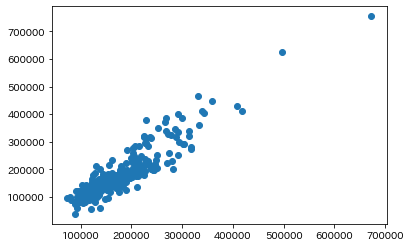

In [23]:
plt.scatter(y_pred_scr, y_test_exp)

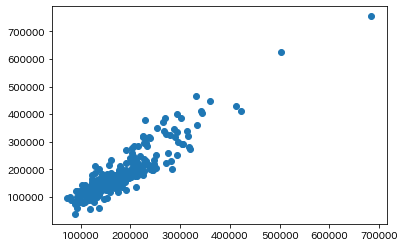

In [24]:
plt.scatter(y_pred, y_test_exp)

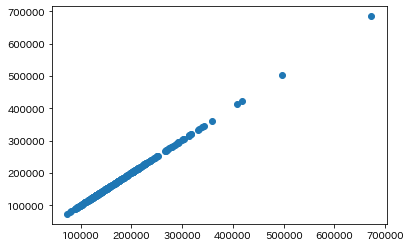

In [25]:
plt.scatter(y_pred_scr, y_pred)

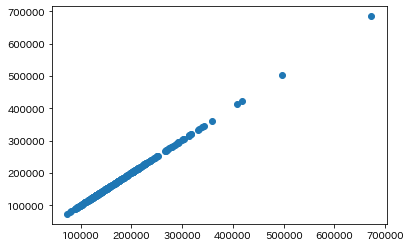

In [26]:
plt.scatter(y_pred_scr[y_pred_scr < 700000], y_pred[y_pred < 700000])

## 大体はy=x上に乗っているので同じような性能を持っていると考えられる。

# 【問題7】学習曲線のプロット

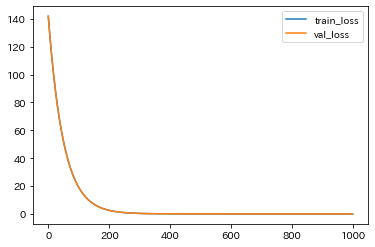

In [27]:
plt.plot(scr_lr.loss, label='train_loss')
plt.plot(scr_lr.val_loss, label='val_loss')
plt.legend()

# 【問題8】（アドバンス課題）バイアス項の除去

In [28]:
scr_lr_no_bias = ScratchLinearRegression(1000, 0.01, True, False)

In [29]:
scr_lr_no_bias.fit(X_train, y_train, X_test, y_test)

In [30]:
scr_lr_no_bias.predict(X_test)

array([[-0.19009432],
       [ 0.20276367],
       [ 0.50053749],
       [ 0.1331078 ],
       [-0.51885303],
       [ 0.34864312],
       [-0.06081041],
       [-0.2865277 ],
       [-0.48695468],
       [-0.11352054],
       [ 0.19918813],
       [ 0.25634854],
       [-0.1706172 ],
       [-0.09126433],
       [-0.02890319],
       [ 0.68488781],
       [ 0.48676383],
       [ 0.76422132],
       [ 0.64276311],
       [-0.32521805],
       [ 0.09239928],
       [-0.21388373],
       [-0.20928819],
       [-0.21813549],
       [ 0.30343672],
       [-0.12829077],
       [-0.37599719],
       [-0.47508217],
       [ 0.14612213],
       [ 0.04143456],
       [-0.06817777],
       [ 0.06647875],
       [-0.41963166],
       [ 0.1887318 ],
       [-0.58272233],
       [ 0.4763075 ],
       [ 0.71299272],
       [ 0.39619691],
       [-0.28364934],
       [-0.24727248],
       [ 0.01269054],
       [ 0.039882  ],
       [ 0.24795798],
       [-0.42147794],
       [ 0.30143631],
       [ 0

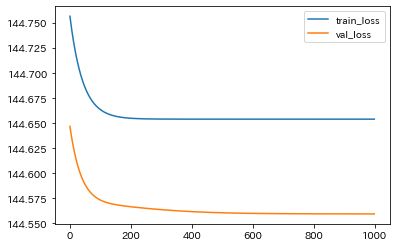

In [31]:
plt.plot(scr_lr_no_bias.loss, label='train_loss')
plt.plot(scr_lr_no_bias.val_loss, label='val_loss')
plt.legend()

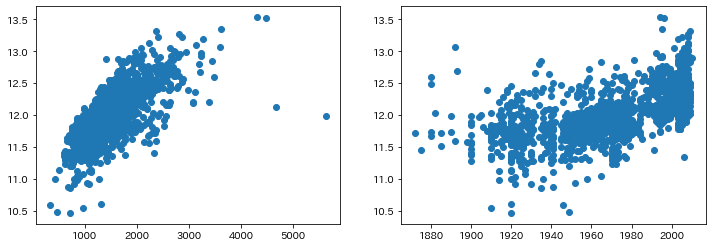

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(X[:, 0], y)
ax[1].scatter(X[:, 1], y)

## 各特徴量とtargetの関係をプロットすると原点を通らない直線が引けそうな関係なので、バイアス項がないとうまく学習を行うことができない。

# 【問題9】（アドバンス課題）特徴量の多次元化

## 特徴量の二乗

In [33]:
X_train_square = X_train**2
X_test_square = X_test**2
X_train_cube = X_train**3
X_test_cube = X_test**3

In [34]:
scr_lr_square = ScratchLinearRegression(1000, 0.01, False, False)
scr_lr_cube = ScratchLinearRegression(1000, 0.01, False, False)

In [35]:
scr_lr_square.fit(X_train_square, y_train, X_test_square, y_test)
scr_lr_cube.fit(X_train_cube, y_train, X_test_cube, y_test)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:130: RuntimeWarning: invalid value encountered in subtract


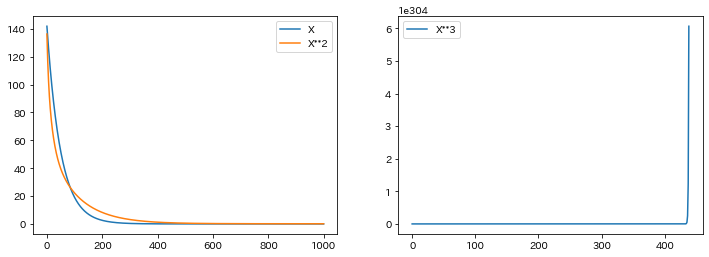

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(scr_lr.loss, label='X')
ax[0].plot(scr_lr_square.loss, label='X**2')
ax[1].plot(scr_lr_cube.loss, label='X**3')
ax[0].legend()
ax[1].legend()

## 特徴量を３乗したものが収束しなかったので、学習率を小さくする

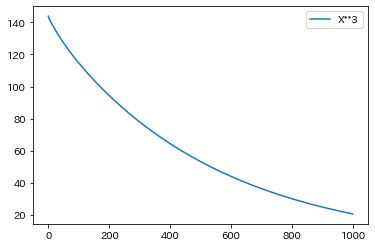

In [37]:
scr_lr_cube = ScratchLinearRegression(1000, 0.001, False, False)
scr_lr_cube.fit(X_train_cube, y_train, X_test_cube, y_test)
plt.plot(scr_lr_cube.loss, label='X**3')
plt.legend()

## 考察
## 特徴量の値が２乗、３乗と分散が大きくなるにしたがって、収束するのに回数が必要になり、学習率も小さくする必要がある。

# 【問題10】（アドバンス課題）更新式の導出

## 各θは目的関数が小さくなるように更新されるので、目的関数を各θで偏微分したものを各θから引けばよい。その時に学習率をかけることで、更新する度合いを変える。
## 例えば特徴量が２個、サンプル数5のデータがあるとすると、仮定関数は$ \theta_0x_0^i + \theta_1x_1^i + \theta_2x_2^i$(iは0から4)とかける。これを目的関数に入れてθ1について偏微分すると$ (\theta_1x_1^i + \theta_0x_0^i + \theta_2x_2^i - y)x_1^i/5$(iは0から4)となり、()の中身が仮定関数-yとなりこれをθ0からθ2まで行えばよいので、勾配降下法の式が求まる。

# 【問題11】（アドバンス課題）局所最適解の問題

## 線形回帰では目的関数の各θの次数は２であるため、どのθについても下に凸のグラフを描くことになる。よって、極小値=最小値となるため、局所最適解が起こることはない。